
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>

  
# Análisis Estadístico de Datos


## Test $\chi^2$ para histogramas

Correr la demo para el conjunto de 1000 datos primero para mostrar que la hipótesis nula no puede ser rechazada. Tengo dos opciones: 1) medir más datos o 2) dejar de medir y aceptar que no voy a poder rechazar la hipótesis nula. Elijo la opción 1: corro el script para 10000 datos y muestro que se rechaza la hipótesis nula.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2

In [2]:
# Para cargar archivos de texto alojados en Colab
# Dar los permisos!
# 2 load the .dat file automatically in colab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# store .dat content in df
# test_chi2_1k.txt
dat_file_Gid1 = '1uLsHWFIHukIb7KKpaiV21E3EJ-CnuZgP'
downloaded1 = drive.CreateFile({'id':dat_file_Gid1})
downloaded1.GetContentFile('test_chi2_1k.txt')
# test_chi2_10k.txt
dat_file_Gid2 = '1Nd70kodfMCiVuSmblu_qrhl7n9FVG-uj'
downloaded2 = drive.CreateFile({'id':dat_file_Gid2})
downloaded2.GetContentFile('test_chi2_10k.txt')

In [3]:
# datos = np.loadtxt('test_chi2_1k.txt') # muestra de 1.000 datos
datos = np.loadtxt('test_chi2_10k.txt') # muestra de 10.000 datos
datos

array([ 0.57756935,  1.05751039, -0.5683277 , ..., -1.04555818,
        0.76741467,  0.62416502])

Histograma

In [4]:
histo, borde_bin = np.histogram(datos, bins=20, range=[-3, 3])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2

Parámetros según la hipótesis nula $H_0$ (distribución normal estándar)

In [5]:
mu = 0
sigma = 1

### Gráfico

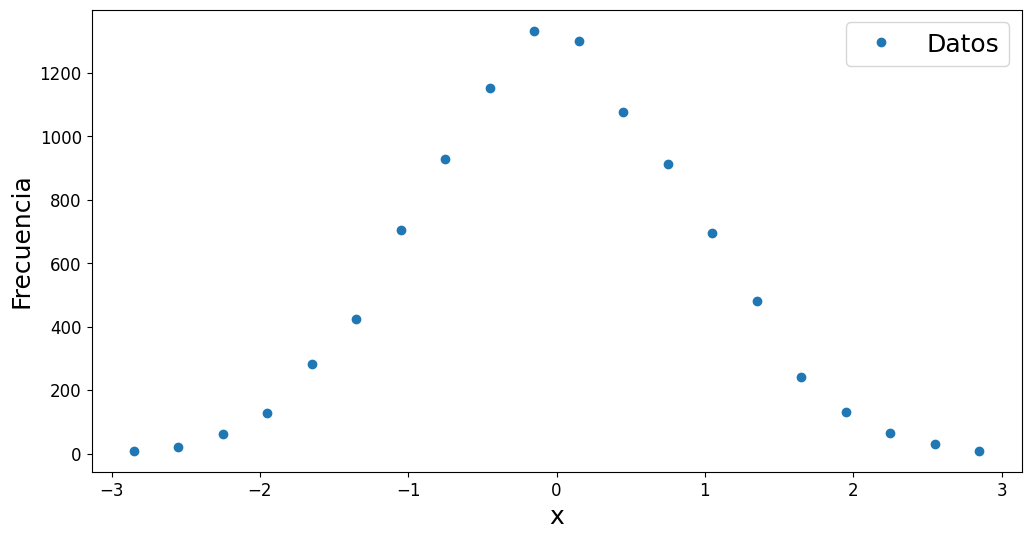

In [6]:
fsize, lsize = 18, 12 # tamaño de fuentes
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('x', fontsize=fsize)
ax1.set_ylabel('Frecuencia', fontsize=fsize)
ax1.plot(centro_bin, histo, 'o', label='Datos')
ax1.legend(fontsize=fsize)
ax1.tick_params(axis='both', which='major', labelsize=lsize)
plt.show()

Graficar PDF N(0,1)

In [7]:
ndatos = len(datos)
ancho_bin = borde_bin[1] - borde_bin[0]
mu = norm.pdf(centro_bin, loc=mu, scale=sigma)  * ndatos * ancho_bin



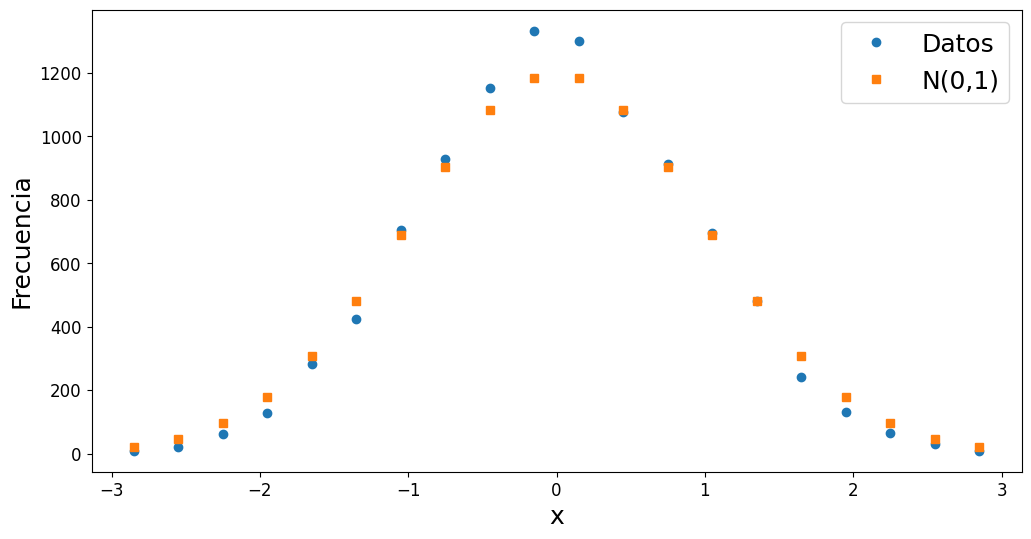

In [8]:
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('x', fontsize=fsize)
ax1.set_ylabel('Frecuencia', fontsize=fsize)
ax1.plot(centro_bin, histo, 'o', label='Datos')
ax1.plot(centro_bin, mu, 's', label='N(0,1)')
ax1.legend(fontsize=fsize)
ax1.tick_params(axis='both', which='major', labelsize=lsize)
plt.show()

### Test $\chi^2$

Selecciono solo los bines con más entradas para que la aproximación Gaussiana al número de entradas del bin sea válida

In [9]:
mu_min = 20

In [10]:
mu_sel = mu[mu>mu_min]
mu_sel

array([  20.61830007,   46.3480414 ,   95.21895551,  178.78411821,
        306.79477369,  481.14998203,  689.64642205,  903.41229646,
       1081.58088738, 1183.43799272, 1183.43799272, 1081.58088738,
        903.41229646,  689.64642205,  481.14998203,  306.79477369,
        178.78411821,   95.21895551,   46.3480414 ,   20.61830007])

In [11]:
print(f'Número de bines seleccionados: {len(mu_sel)}')

Número de bines seleccionados: 20


In [12]:
sigma_sel = np.sqrt(mu_sel)
sigma_sel

array([ 4.54073783,  6.80793959,  9.75802006, 13.37101784, 17.51555805,
       21.93513123, 26.26111997, 30.0568178 , 32.88739709, 34.4011336 ,
       34.4011336 , 32.88739709, 30.0568178 , 26.26111997, 21.93513123,
       17.51555805, 13.37101784,  9.75802006,  6.80793959,  4.54073783])

In [13]:
histo_sel = histo[mu>mu_min]
histo_sel

array([   9,   21,   63,  128,  281,  423,  706,  929, 1151, 1333, 1302,
       1078,  913,  694,  482,  241,  131,   66,   29,    9])

In [14]:
z = (histo_sel-mu_sel) / sigma_sel
z

array([-2.5586811 , -3.72330587, -3.3017923 , -3.79807422, -1.47267781,
       -2.65099768,  0.62272965,  0.85131113,  2.11081201,  4.3475895 ,
        3.44645641, -0.10888327,  0.31898598,  0.16578036,  0.03875144,
       -3.75636183, -3.57370836, -2.99435288, -2.54820731, -2.5586811 ])

In [15]:
t_obs = np.sum(z*z)
print("Estadístico del test = ", t_obs)

Estadístico del test =  140.31186749439638


Pvalor

In [16]:
grados_libertad = len(histo_sel)
grados_libertad

20

In [17]:
t = np.linspace(0, 2*t_obs, 256)
pdf_chi2 = chi2.pdf(t, df=grados_libertad)


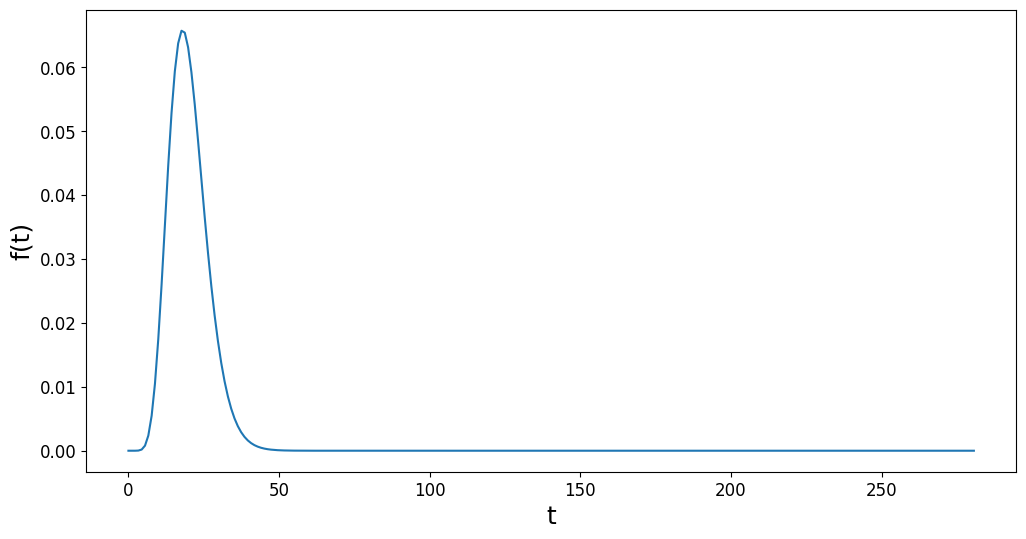

In [18]:
fig2, ax2 = plt.subplots(figsize=(12,6))
ax2.set_xlabel('t', fontsize=fsize)
ax2.set_ylabel('f(t)', fontsize=fsize)
ax2.plot(t, pdf_chi2)
ax2.tick_params(axis='both', which='major', labelsize=lsize)
plt.show()

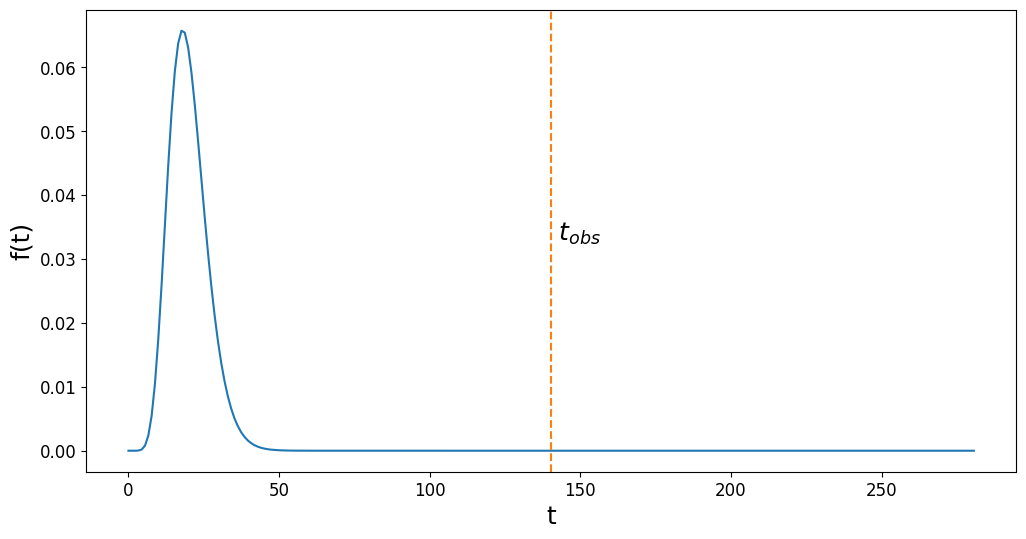

In [19]:
fig2, ax2 = plt.subplots(figsize=(12,6))
ax2.set_xlabel('t', fontsize=fsize)
ax2.set_ylabel('f(t)', fontsize=fsize)
ax2.plot(t, pdf_chi2)
ax2.tick_params(axis='both', which='major', labelsize=lsize)
ax2.axvline(t_obs, ls='--', color='tab:orange')
ax2.text(t_obs, 0.5, ' $t_{obs}$',
         transform=ax2.get_xaxis_text1_transform(0)[0], fontsize=fsize)
plt.show()

In [20]:
p_valor = chi2.sf(t_obs, df=grados_libertad)
print(f'pvalor = {100*p_valor:.1e}%')

pvalor = 4.4e-18%


In [22]:
sigmas = norm.isf(p_valor)
print(f'nivel de confianza = {sigmas:.1f}σ')

nivel de confianza = 9.1σ
